##  Importar bibliotecas

In [54]:
import pandas as pd
import numpy as np
import pmdarima
import matplotlib.pyplot as plt

## Importar dataframe

In [55]:
# 1) Ler base mensal pronta para modelagem
df = pd.read_parquet(
    "/home/usuario/Documentos/Escorpiao_series/Dados_processados/series_mensal_model_ready.parquet"
)

# 2) Checagens rápidas
print(df.shape)
print(df.dtypes)
df.head()

(62420, 7)
DATA           datetime64[ns]
NOME_MUNI              object
ANO                     int32
MES                     int32
POPULACAO             float64
CASOS                 float64
TAXA_MENSAL           float64
dtype: object


,DATA,NOME_MUNI,ANO,MES,POPULACAO,CASOS,TAXA_MENSAL
0,2014-01-01,ADAMANTINA,2014,1,35673.0,2.0,5.6
1,2014-02-01,ADAMANTINA,2014,2,35673.0,2.0,5.6
2,2014-03-01,ADAMANTINA,2014,3,35673.0,0.0,0.0
3,2014-04-01,ADAMANTINA,2014,4,35673.0,2.0,5.6
4,2014-05-01,ADAMANTINA,2014,5,35673.0,8.0,22.4


## Rodar piloto somente em um municipio

In [56]:
# Escolha um município para o piloto
municipio = 'ASSIS'   # pode trocar depois

# Filtrar dados do município
df_mun = df[df['NOME_MUNI'] == municipio].copy()

# Ordenar por data
df_mun = df_mun.sort_values('DATA')

# Criar a série temporal (index datetime, valores = TAXA_MENSAL)
y = df_mun.set_index('DATA')['TAXA_MENSAL']

# Conferências
print(y.shape)
y.head(12), y.tail(12)


(107,)


(DATA
 2014-02-01    1.9
 2014-03-01    3.8
 2014-04-01    0.0
 2014-05-01    1.9
 2014-06-01    0.0
 2014-07-01    3.8
 2014-08-01    3.8
 2014-09-01    0.0
 2014-10-01    5.7
 2014-11-01    3.8
 2014-12-01    0.0
 2015-01-01    0.0
 Name: TAXA_MENSAL, dtype: float64,
 DATA
 2022-01-01     1.9
 2022-02-01     5.7
 2022-03-01     3.8
 2022-04-01    17.2
 2022-05-01    11.4
 2022-06-01     9.5
 2022-07-01    26.7
 2022-08-01     9.5
 2022-09-01    34.3
 2022-10-01    38.1
 2022-11-01    26.7
 2022-12-01    42.0
 Name: TAXA_MENSAL, dtype: float64)

In [57]:
from pmdarima import auto_arima

# Ajuste do modelo SARIMA automático
modelo = auto_arima(
    y,                  # série temporal
    seasonal=True,      # há sazonalidade
    m=12,               # período sazonal = 12 meses
    stepwise=True,      # busca mais rápida
    suppress_warnings=True,
    error_action='ignore',
    trace=True          # MOSTRA os modelos testados (didático)
)

# Resumo do modelo escolhido
modelo.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=671.295, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=647.223, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=642.397, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=669.772, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=640.972, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=642.615, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=641.108, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=640.102, Time=0.03 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=641.554, Time=0.07 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=641.276, Time=0.07 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=639.010, Time=0.09 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=64

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -314.737
Date:                Sat, 20 Dec 2025   AIC                            637.474
Time:                        23:01:39   BIC                            648.127
Sample:                    02-01-2014   HQIC                           641.792
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2099      0.137     -8.839      0.000      -1.478      -0.942
ar.L2         -0.5508      0.087     -6.353      0.000      -0.721      -0.381
ma.L1          0.6725      0.163      4.132      0.000       0.353       0.992
sigma2        22.0849      2.350      9.398      0.000      17.479      26.691
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                27.30
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               5.26   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

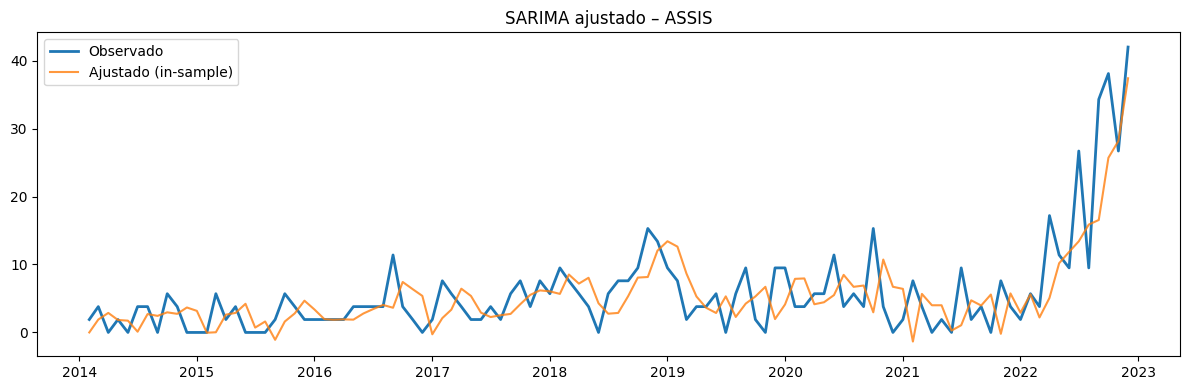

In [58]:
# Valores ajustados (in-sample)
y_fitted = pd.Series(modelo.predict_in_sample(), index=y.index)

# Gráfico: observado vs ajustado
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(y_fitted, label='Ajustado (in-sample)', alpha=0.8)
plt.title(f'SARIMA ajustado – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()


## Previsão no modelo

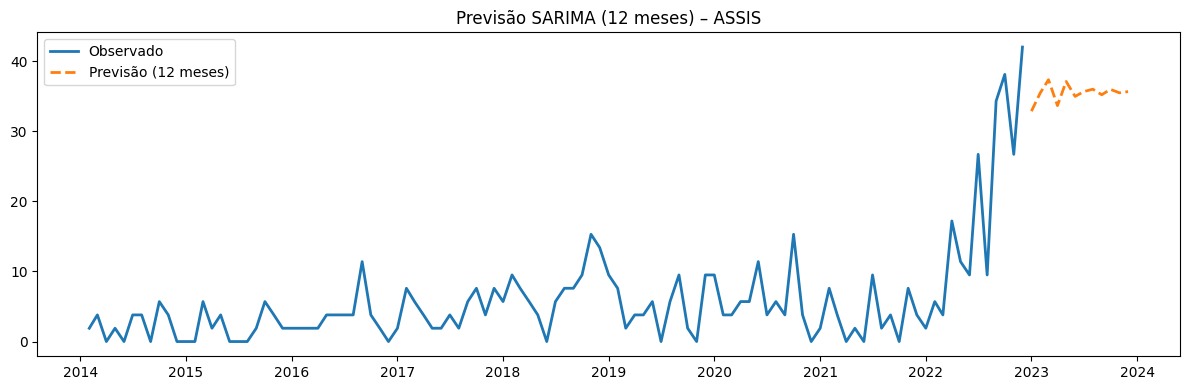

,PREV_TAXA_MENSAL
2023-01-01,32.856876
2023-02-01,35.492197
2023-03-01,37.339693
2023-04-01,33.652785
2023-05-01,37.096115
2023-06-01,34.960657
2023-07-01,35.647831
2023-08-01,35.992612
2023-09-01,35.196949
2023-10-01,35.969747


In [59]:
# Prever 12 meses à frente
n_periods = 12
prev_12 = modelo.predict(n_periods=n_periods)

# Criar índice de datas futuras
datas_futuras = pd.date_range(
    start=y.index[-1] + pd.offsets.MonthBegin(),
    periods=n_periods,
    freq='MS'
)

# DataFrame da previsão
df_prev = pd.DataFrame(
    {'PREV_TAXA_MENSAL': prev_12},
    index=datas_futuras
)

# Plot: histórico + previsão
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.title(f'Previsão SARIMA (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev


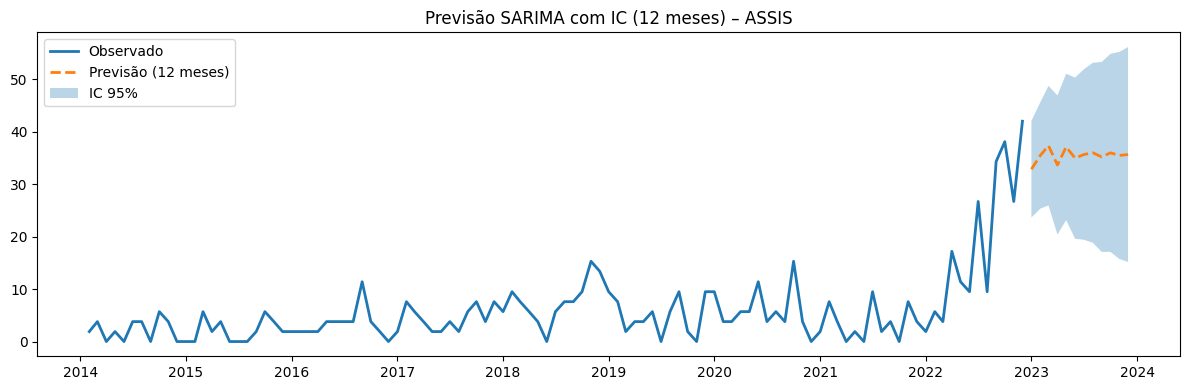

,PREV_TAXA_MENSAL,IC_INF,IC_SUP
2023-01-01,32.856876,23.646115,42.067637
2023-02-01,35.492197,25.343752,45.640643
2023-03-01,37.339693,25.947204,48.732183
2023-04-01,33.652785,20.387832,46.917738
2023-05-01,37.096115,23.141602,51.050629
2023-06-01,34.960657,19.599940,50.321374
2023-07-01,35.647831,19.414604,51.881058
2023-08-01,35.992612,18.847809,53.137416
2023-09-01,35.196949,17.085090,53.308807
2023-10-01,35.969747,17.097833,54.841662


In [60]:
# Previsão com intervalos de confiança (95%)
prev_12, ic_12 = modelo.predict(
    n_periods=12,
    return_conf_int=True,
    alpha=0.05
)

# DataFrame com previsão e IC
df_prev_ic = pd.DataFrame({
    'PREV_TAXA_MENSAL': prev_12,
    'IC_INF': ic_12[:, 0],
    'IC_SUP': ic_12[:, 1]
}, index=datas_futuras)

# Plot: histórico + previsão + IC
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev_ic['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.fill_between(
    df_prev_ic.index,
    df_prev_ic['IC_INF'],
    df_prev_ic['IC_SUP'],
    alpha=0.3,
    label='IC 95%'
)
plt.title(f'Previsão SARIMA com IC (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev_ic
